## **Setup**

In [ ]:
from IPython.display import clear_output

from google.colab import drive
drive.mount("/content/gdrive")

clear_output()

In [ ]:
PATH = "/content/gdrive/My Drive/Datasets/diabetes.csv"


def breaker(num: int=50, char: str="*") -> None:
    print("\n" + num*char + "\n")

## **Library Imports**

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import random as r
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

SEED = 42

## **Load Data**

In [ ]:
df = pd.read_csv(PATH)
df = df.drop(labels=["PatientID"], axis=1)
df.head(5)

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


## Graphs


**************************************************



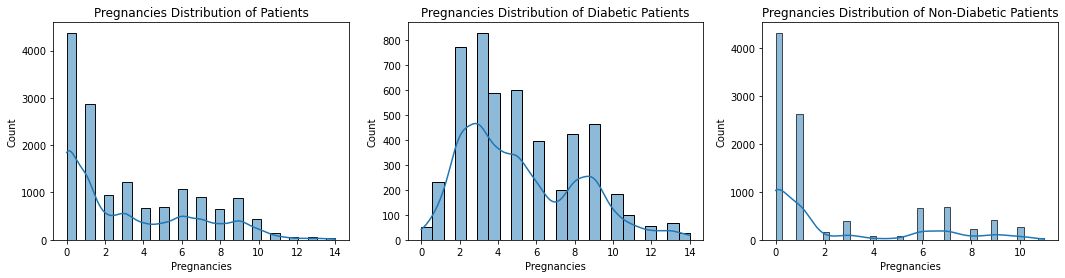


**************************************************



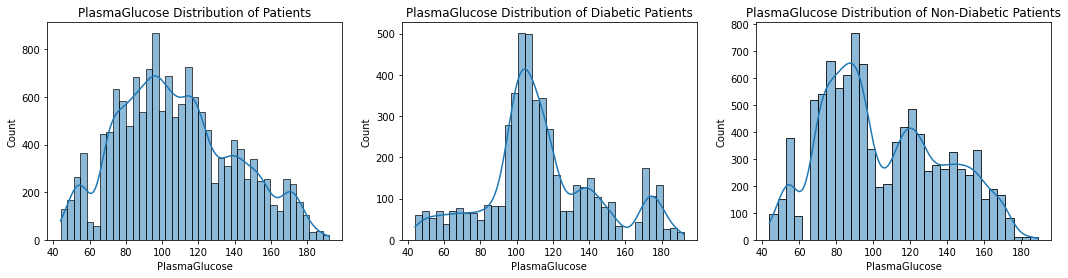


**************************************************



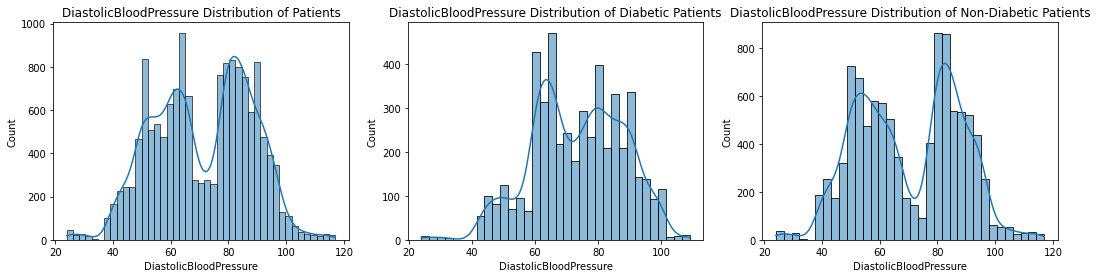


**************************************************



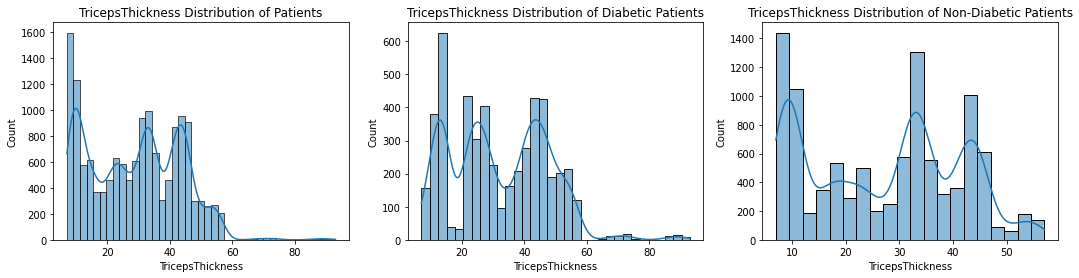


**************************************************



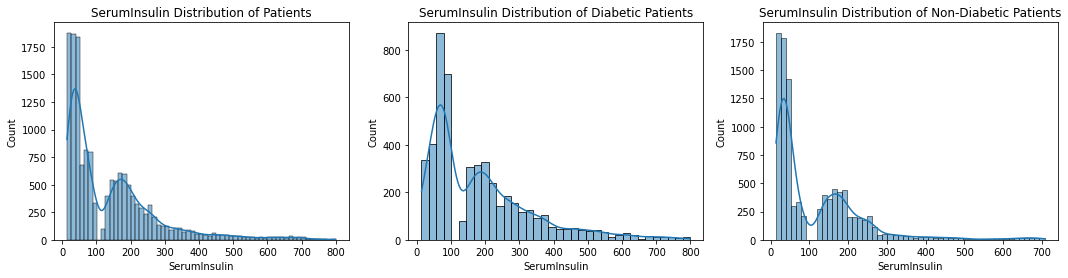


**************************************************



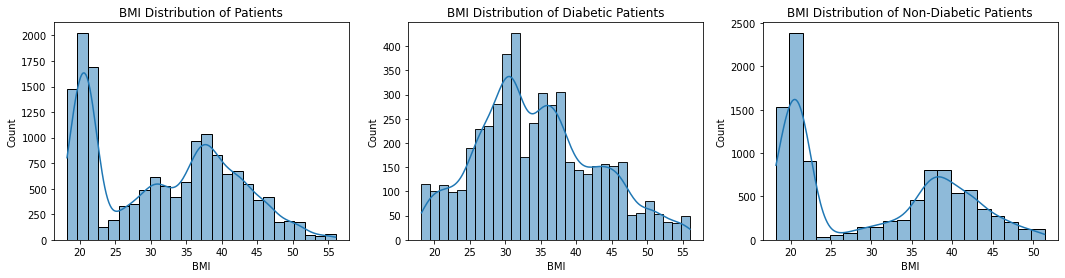


**************************************************



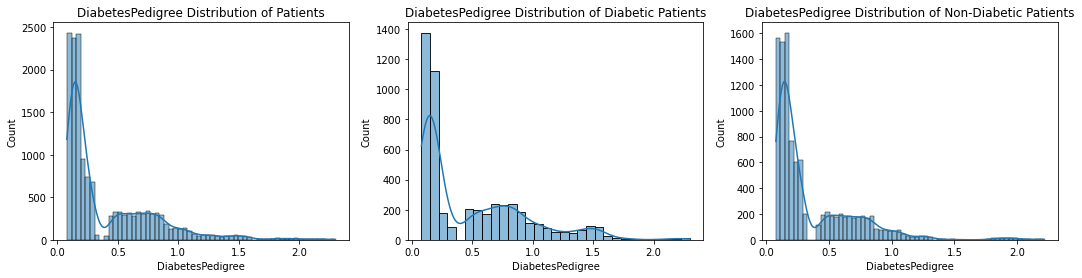


**************************************************



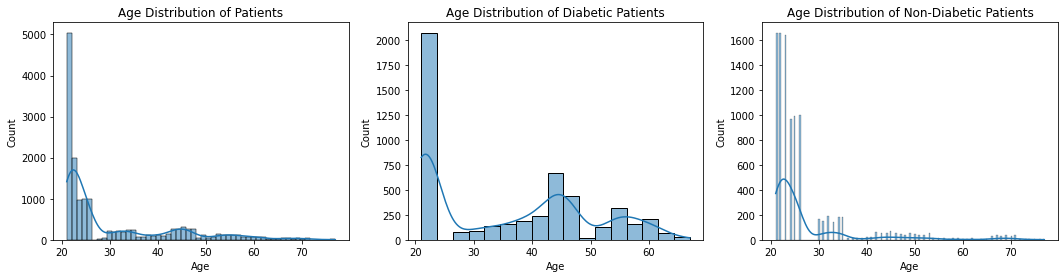


**************************************************



In [ ]:
df_diabetic = df[df.Diabetic == 1]
df_non_diabetic = df[df.Diabetic == 0]

def show_graphs(data_1, data_2, data_3, column: str) -> None:
    plt.figure(figsize=(18, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(data=data_1, x=column, kde=True)
    plt.title(f"{column} Distribution of Patients")
    plt.subplot(1, 3, 2)
    sns.histplot(data=data_2, x=column, kde=True)
    plt.title(f"{column} Distribution of Diabetic Patients")
    plt.subplot(1, 3, 3)
    sns.histplot(data=data_3, x=column, kde=True)
    plt.title(f"{column} Distribution of Non-Diabetic Patients")
    plt.show()

columns = [col for col in df.columns][:-1]

breaker()
for column in columns:
    show_graphs(df, df_diabetic, df_non_diabetic, column)
    breaker()

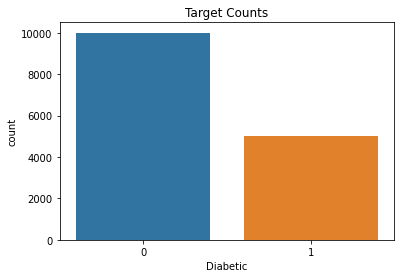

In [ ]:
sns.countplot(data=df, x="Diabetic")
plt.title("Target Counts")
plt.show()

## **Split**

In [ ]:
X, y = df.iloc[:, :-1].copy().values, df.iloc[:, -1].copy().values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)

features = [i for i in range(df.shape[1] - 1)]

feature_transformer = Pipeline(
    steps=[
        ("Standard_Scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("features", feature_transformer, features),
    ]
)

## **Pipeline Setup**

In [ ]:
class Pipelines(object):
    def __init__(self, model_name: str, preprocessor):

        self.model_name = model_name

        if self.model_name == "lgr":
            self.model = Pipeline(
                steps=[
                    ("preprocessor", preprocessor),
                    ("classifier", LogisticRegression()),
                ]
            )

        elif self.model_name == "knc":
            self.model = Pipeline(
                steps=[
                    ("preprocessor", preprocessor),
                    ("classifier", KNeighborsClassifier()),
                ]
            )
        
        elif self.model_name == "dtc":
            self.model = Pipeline(
                steps=[
                    ("preprocessor", preprocessor),
                    ("classifier", DecisionTreeClassifier(random_state=SEED)),
                ]
            )
        
        elif self.model_name == "rfc":
            self.model = Pipeline(
                steps=[
                    ("preprocessor", preprocessor),
                    ("classifier", RandomForestClassifier(random_state=SEED)),
                ]
            )
        
        elif self.model_name == "gbc":
            self.model = Pipeline(
                steps=[
                    ("preprocessor", preprocessor),
                    ("classifier", GradientBoostingClassifier(random_state=SEED)),
                ]
            )
        
        elif self.model_name == "svc":
            self.model = Pipeline(
                steps=[
                    ("preprocessor", preprocessor),
                    ("classifier", SVC()),
                ]
            )
        
        elif self.model_name == "xgc":
            self.model = Pipeline(
                steps=[
                    ("preprocessor", preprocessor),
                    ("classifier", XGBClassifier()),
                ]
            )
    
    def save(self):
        # Pickling the model serializes the entire pipeline
        with open(f"{self.model_name}.pkl", "wb") as fp:
            pickle.dump(self.model, fp)

## **Training and Evaluation**

In [ ]:
def print_scores(y_true: np.ndarray, y_pred: np.ndarray):
    print(f"Accuracy  : {accuracy_score(y_pred, y_true):.5f}")
    print(f"ROC-AUC   : {roc_auc_score(y_pred, y_true):.5f}")

    precision, recall, f_score, _ = precision_recall_fscore_support(y_pred, y_true)
    print(f"Precision : {precision}")
    print(f"Recall    : {recall}")
    print(f"F-Score   : {f_score}")

In [ ]:
names = ["lgr", "knc", "dtc", "rfc", "gbc", "svc", "xgc"]

breaker()
i = 0
for name in names:
    if name == "lgr": print("Logistic Regression \n")
    if name == "knc": print("K-Neighbours Classifier \n")
    if name == "dtc": print("Decision Tree Classifier \n")
    if name == "rfc": print("Random Forest Classifier \n")
    if name == "gbc": print("Gradient Boosting Classifier \n")
    if name == "svc": print("Support Vector Classifier \n")
    if name == "xgc": print("XGB Classifier \n")

    # Train
    pipeline = Pipelines(name, preprocessor)
    pipeline.model.fit(X_train, y_train)
    pipeline.save()

    # Evaluation
    y_pred = pipeline.model.predict(X_valid)

    print_scores(y_valid, y_pred)
    breaker()


**************************************************

Logistic Regression 

Accuracy  : 0.78900
ROC-AUC   : 0.77016
Precision : [0.89870904 0.56490872]
Recall    : [0.80839661 0.73193167]
F-Score   : [0.85116388 0.63766457]

**************************************************

K-Neighbours Classifier 

Accuracy  : 0.86533
ROC-AUC   : 0.85481
Precision : [0.92502483 0.74340771]
Recall    : [0.88043478 0.82918552]
F-Score   : [0.90217918 0.78395722]

**************************************************

Decision Tree Classifier 

Accuracy  : 0.89300
ROC-AUC   : 0.88122
Precision : [0.9285005  0.82048682]
Recall    : [0.913532   0.84889822]
F-Score   : [0.92095543 0.83445075]

**************************************************

Random Forest Classifier 

Accuracy  : 0.93333
ROC-AUC   : 0.93013
Precision : [0.96375372 0.87119675]
Recall    : [0.93858801 0.92167382]
F-Score   : [0.95100441 0.89572471]

**************************************************

Gradient Boosting Classifier 

Accuracy  

## **Predictions**